# INTRODUCTION

I am using Kaggle's Default of Credit Card Clients Dataset as an exercise for default prediction methods. Any comments and suggestions are more than welcome.

## Data information

Following information from Keggle:

> This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Monetary and payment values are in New Taiwanease dollars. As of 2024, $1 EUR \approx 35 NTD$.

There are 25 variables in the dataset:

- **ID:** ID of each client
- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX:** Gender (1=male, 2=female)
- **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years
- **PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2:** Repayment status in August, 2005 (scale same as above)
- **PAY_3:** Repayment status in July, 2005 (scale same as above)
- **PAY_4:** Repayment status in June, 2005 (scale same as above)
- **PAY_5:** Repayment status in May, 2005 (scale same as above)
- **PAY_6:** Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month:** Default payment (1=yes, 0=no)

## Loading libraries and data

We will begin by importing Python libraries that will be used and by loading the dataset:


^C
Note: you may need to restart the kernel to use updated packages.


In [34]:
### Installing libraries if not yet in prompt
#!pip install scikit-learn
#!pip install xgboost
#!pip install dataprep
#!pip install pandas_profiling
#!pip install cufflinks
#!pip install -U regex
#!pip install -U levenshtein
#!pip install numba==0.58.1
#%pip install dataprep
#!pip install statsmodels


### LIBRARIES to be used
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import randint  # for statistical distributions
import xgboost as xgb  # for extreme gradient boosting

#For Exploratory Data Analysis - Useful for 
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report
#from numba import generated_jit
#from pandas_profiling import ProfileReport

# Visualization libraries
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for creating attractive and informative statistical graphics
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Setting display options
from pandas import set_option
plt.style.use('ggplot')  # setting plot style, as used in R's Tidyverse

# Scikit-learn libraries for machine learning tasks will be loaded when used



In [20]:
###Importing dataset
data = 'C:/Users/u0135988/OneDrive - KU Leuven/Research/Quant/Methods_Quant_Fin/Example - Credit Card Default - Keggle/UCI_Credit_Card.csv'
data_df = pd.read_csv(data)

print("Default Credit Card data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Default Credit Card data -  rows: 30000  columns: 25


## Exploring the data

Now that the data has been uploaded, we will have a quick look at its variables.



In [21]:
###Getting a glimpse of the data

#Show first rows
data_df.head()




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,...,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


In [22]:
#Describe variables with main summary statistics

pd.options.display.float_format = '{:.2f}'.format #to limit float to two numbers after comma
data_df.describe()

#As a reminder:
#Limit_bal is credit; sex 2=female; marriage=1 (single 2), 
#pay_t repayment status (-1 is full payment, >0 shows amount of delay in months)
#bill_t amount of bill; pay_amt_t amount of previous payment
#outcome variable: default.payment.next.month


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00



We see from the data that individuals had an average credit of 167484 NDP (~4735 EUR), most individuals are females, highly educated and maried with an average age of about 35 years.

From the outcome variable, we see that around 22% of our sample defaulted in september.

But it is important to understand better how different is the population defaulting?


In [23]:

defaulting_df = data_df[data_df['default.payment.next.month'] == 1]

defaulting_df.describe()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,...,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00,6636.00
mean,14773.78,130109.66,1.57,1.89,1.53,35.73,0.67,0.46,0.36,0.25,...,42036.95,39540.19,38271.44,3397.04,3388.65,3367.35,3155.63,3219.14,3441.48,1.00
std,8571.62,115378.54,0.50,0.73,0.53,9.69,1.38,1.50,1.50,1.51,...,64351.08,61424.70,59579.67,9544.25,11737.99,12959.62,11191.97,11944.73,13464.01,0.00
min,1.00,10000.00,1.00,1.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-65167.00,-53007.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,7408.50,50000.00,1.00,1.00,1.00,28.00,0.00,0.00,-1.00,-1.00,...,2141.50,1502.75,1150.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,14758.50,90000.00,2.00,2.00,2.00,34.00,1.00,0.00,0.00,0.00,...,19119.50,18478.50,18028.50,1636.00,1533.50,1222.00,1000.00,1000.00,1000.00,1.00
75%,21831.75,200000.00,2.00,2.00,2.00,42.00,2.00,2.00,2.00,2.00,...,50175.75,47853.00,47424.00,3478.25,3309.75,3000.00,2939.25,3000.00,2974.50,1.00
max,30000.00,740000.00,2.00,6.00,3.00,75.00,8.00,7.00,8.00,8.00,...,548020.00,547880.00,514975.00,300000.00,358689.00,508229.00,432130.00,332000.00,345293.00,1.00



## First glance at probability of default using logistic regression

As a quick first assessment, we propose a logit regression to understand the variables that can increase the likelihood of default:



In [27]:

#Modify variables to improve interpretation:
data_df['female'] = (data_df['SEX'] == 2).astype(int)
data_df['married'] = (data_df['MARRIAGE'] == 1).astype(int)

# Define the independent variables and the dependent variable
independent_vars = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'female', 'married']
X = data_df[independent_vars]
y = data_df['default.payment.next.month']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#Save fitted values
data_df['y_fitted'] = result.predict(X)

# Summary of the logistic regression
logit_summary = result.summary2().tables[1]

# Result in odds ratios by taking the exponential the coefficients
odds_ratios = np.exp(result.params)
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'p-value': result.pvalues
})


print(logit_summary)
print(odds_ratios_df)



Optimization terminated successfully.
         Current function value: 0.464536
         Iterations 7
           Coef.  Std.Err.      z  P>|z|  [0.025  0.975]
const      -1.48      0.07 -21.07   0.00   -1.61   -1.34
LIMIT_BAL  -0.10      0.02  -5.05   0.00   -0.14   -0.06
EDUCATION  -0.10      0.02  -4.94   0.00   -0.14   -0.06
AGE         0.01      0.00   3.52   0.00    0.00    0.01
PAY_0       0.58      0.02  32.73   0.00    0.54    0.61
PAY_2       0.09      0.02   4.32   0.00    0.05    0.13
PAY_3       0.07      0.02   3.28   0.00    0.03    0.12
PAY_4       0.05      0.02   2.53   0.01    0.01    0.09
BILL_AMT1  -0.41      0.08  -4.87   0.00   -0.57   -0.24
BILL_AMT2   0.17      0.11   1.54   0.12   -0.04    0.38
BILL_AMT3   0.09      0.09   0.98   0.33   -0.09    0.27
BILL_AMT4  -0.01      0.09  -0.11   0.92   -0.18    0.16
BILL_AMT5   0.05      0.09   0.51   0.61   -0.13    0.23
BILL_AMT6   0.03      0.07   0.37   0.71   -0.11    0.17
PAY_AMT1   -0.23      0.04  -5.90   0.00   


From the odd`s ratios, we see that the only variables that decrease the likelihood of default are a higher level of education and being a woman. While being maried, being older, or the amount of payments in september, increase the odds of defaulting.

Still, as limit_bal, bill_amt_t, pay_amt_t are floats with a high variation, it is harder to interpret. For this we propose to standardize with a normal those values.

It is is clear that PAY_0 of september will be highly linked with the default status in september. Assuming we are in one month prior (without the information of PAY_0, BILL_AMT1, and PAY_AMT1 in september) we will run the same regression without this information.

Finally, to avoid overfitting, we will use 70% of our dataset as training set, and 30% as test set.





In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume data_df is your DataFrame containing the data

variables_to_standardize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_df_standard = data_df.copy()

# Standardize the variables
for var in variables_to_standardize:
    data_df_standard[var] = (data_df[var] - data_df[var].mean()) / data_df[var].std()

# Split the dataset into training (70%) and test (30%) sets using a seed for replications
df_train, df_test = train_test_split(data_df_standard, test_size=0.3, random_state=42)

independent_vars = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'female', 'married']
X_train = df_train[independent_vars]
y_train = df_train['default.payment.next.month']

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model_train = sm.Logit(y_train, X_train)
result_train = logit_model_train.fit()

# Calculate odds ratios
odds_ratios = np.exp(result_train.params)
odds_ratios_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'p-value': result_train.pvalues
})

print(result_train.summary())
print(odds_ratios_df)

# Ensure the same columns are used for prediction
X_all = data_df_standard[independent_vars]
X_all = sm.add_constant(X_all)

# Predict using the fitted model
data_df_standard['y_fitted'] = result_train.predict(X_all)

# Display the DataFrame
data_df_standard.head()

Optimization terminated successfully.
         Current function value: 0.483569
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20981
Method:                                   MLE   Df Model:                           18
Date:                        Mon, 03 Jun 2024   Pseudo R-squ.:                 0.08806
Time:                                11:09:34   Log-Likelihood:                -10155.
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4091      0.082    -17.196 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,female,married,y_fitted,default_predicted
0,1,-1.14,2,2,1,24,2,2,-1,-1,...,-0.23,-0.30,-0.31,-0.31,-0.29,1,1,1,0.39,1
1,2,-0.37,2,2,2,26,-1,2,0,0,...,-0.21,-0.24,-0.24,-0.31,-0.18,1,1,0,0.37,0
2,3,-0.60,2,2,2,34,0,0,0,0,...,-0.19,-0.24,-0.24,-0.25,-0.01,0,1,0,0.23,0
3,4,-0.91,2,2,1,37,0,0,0,0,...,-0.17,-0.23,-0.24,-0.24,-0.24,0,1,1,0.27,0
4,5,-0.91,1,2,1,57,-1,0,-1,0,...,1.34,0.27,0.27,-0.27,-0.26,0,0,1,0.20,0



We see that the it is now easier to interpret variables, since the payment/credit variables are now scaled.

A higher credit (limit_bal) and previous payment (pay_amt) are associated with smaller odds of defaulting. The size of the credit card bill (bill_amt) is less useful to determine if a person will default, with only the previous bill_amt2 (of the month of august) having an odds ratio significantly different than 1. In this case, individuals with higher bill sizes in august were less likely to default in september. This might be linked to non-defaulting individuals experiencing no credit constraint one month prior.

We can estimate the fitted values and determine a cutoff point of our estimation to determine if an observation is probably a default. We need to be careful regarding false positives and false negatives.

We will evaluate accuracy (total predictions over total instances), precision (true positives over true & false positives), recall/sensitivity (true positives over true positives and false negatives), specificity (true negatives over true negatives & false positives), F1 score, area under the Receiver Operating Characteristic curve, and .

Accuracy is usually used when the distributions are very balanced between positive and negative observations of the target variable. Since as it is often the case in fraud and default cases, positive observations are less common than negative ones, and a model maximizing accuracy may lead (proportionally) to many false negatives, when the usefulness of the model usually lies on finding possible cases of default or fraud.

Precision focus on the proportion of true positives face to true and false positives. It is useful when the cost of false positives is high. For example, in spam detection, a false positive means a legitimate email is marked as spam, which could be problematic.

The recall (or sensitivity) shows how well model predicts true positives regarding all actually positive observations (i.e. true positives + false negatives). Inverserly to the precision case, it is useful when the cost of false negative is high (e.g. medical diagnosis).

Specificity is similar to recall/sensitivity but for the true negative results (ration of when model predicts true negatives over all actually negative observations).

The F1 Score is a measure of balance between precision and recalled, is given by an harmonic mean: $F1 = 2 . \frac{Precision \times Recall}{Precision+Recall}$ . Can be very useful for imbalanced datasets.

The Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall/sensitivity) against the false positive rate (1-Specificity). The area under its curve (AUC) is a very popular measure to evaluate the performance of prediction, since it balances both true and false positives. We will use it in our optimization process to choose the best possible cutoff point.



In [28]:

data_df_standard.describe()

#We will now use its fitted values to estimate the cutoff point to maximize the area under the curve.




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,female,married,y_fitted
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,-0.00,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.22,0.60,0.46,0.22
std,8660.40,1.00,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,1.00,1.00,1.00,1.00,1.00,1.00,0.42,0.49,0.50,0.15
min,1.00,-1.21,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-0.34,-0.26,-0.30,-0.31,-0.31,-0.29,0.00,0.00,0.00,0.00
25%,7500.75,-0.91,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,-0.28,-0.22,-0.27,-0.29,-0.30,-0.29,0.00,0.00,0.00,0.12
50%,15000.50,-0.21,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,-0.22,-0.17,-0.19,-0.21,-0.22,-0.21,0.00,1.00,0.00,0.19
75%,22500.25,0.56,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,-0.04,-0.04,-0.04,-0.05,-0.05,-0.07,0.00,1.00,1.00,0.26
max,30000.00,6.42,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,52.40,72.84,50.59,39.33,27.60,29.44,1.00,1.00,1.00,0.99


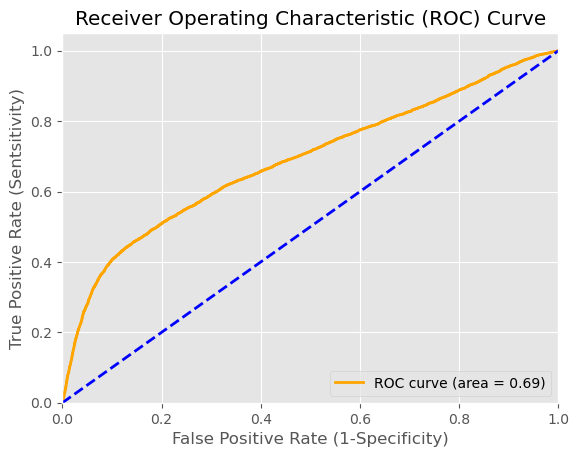

The optimal threshold of the model is: 0.2801260605737156
The optimal area under the curve of the model is: 0.6882974955209992
The precision of the model is: 0.47559252864542456
The accuracy of the model is: 0.7684333333333333
The recall of the model is: 0.4566003616636528
The F1 score of the model is: 0.5875459076294874


In [46]:
#Load scikit learn functions to evaluate precision of the model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score

# Compute ROC curve and area under the curve
# The Receiver Operating Characteristic (ROC) is a curve accounting for sensitive and 1-specificity 
#Here fpr is the false positive rate (i.e. the rate of attributing default to individuals paying on time)
#Here tpr is the true positive rate or recall (true positive/(true positive+false negative))
fpr, tpr, thresholds = roc_curve(data_df_standard['default.payment.next.month'], data_df_standard['y_fitted'])
roc_auc = roc_auc_score(data_df_standard['default.payment.next.month'], data_df_standard['y_fitted'])

# Find the optimal cutoff threshold that maximizes the area under the curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]


#Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') #45 degree line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sentsitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# Define y_cutoff based on the optimal threshold
data_df_standard['default_predicted'] = (data_df_standard['y_fitted'] >= optimal_threshold).astype(int)

print("The optimal threshold of the model is: " +str(optimal_threshold))
print("The optimal area under the curve of the model is: " +str(roc_auc))


precision = precision_score(data_df_standard['default.payment.next.month'], data_df_standard['default_predicted'])
accuracy = accuracy_score(data_df_standard['default.payment.next.month'], data_df_standard['default_predicted'])
recall = recall_score(data_df_standard['default.payment.next.month'], data_df_standard['default_predicted'])
F1 = 2*(accuracy*precision)/(accuracy+precision)


print("The precision of the model is: " +str(precision))
print("The accuracy of the model is: " +str(accuracy))
print("The recall of the model is: " +str(recall))
print("The F1 score of the model is: " +str(F1))




## Other predictive models 

### Random forrest classifier




### XGBoost




### Support vector machine



In [20]:
#report = ProfileReport(data_df)
#report

NameError: name 'ProfileReport' is not defined